In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14

# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
sample_freq = (62.5) * u.MHz # 62.5 MHz
dt = (1 / sample_freq).to(u.ns) # 16 ns

N_samples = 16000

sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
plus_data = np.loadtxt('x_p_data_5_1.txt', dtype = np.int16) * scaling_factor
minus_data = np.loadtxt('x_m_data_5_1.txt', dtype = np.int16) * scaling_factor

In [4]:
plus_fft, minus_fft = np.fft.fft(plus_data) / sampling_time , np.fft.fft(minus_data) / sampling_time

In [5]:
plus_power, minus_power = np.abs(plus_fft)**2 , np.abs(minus_fft)**2

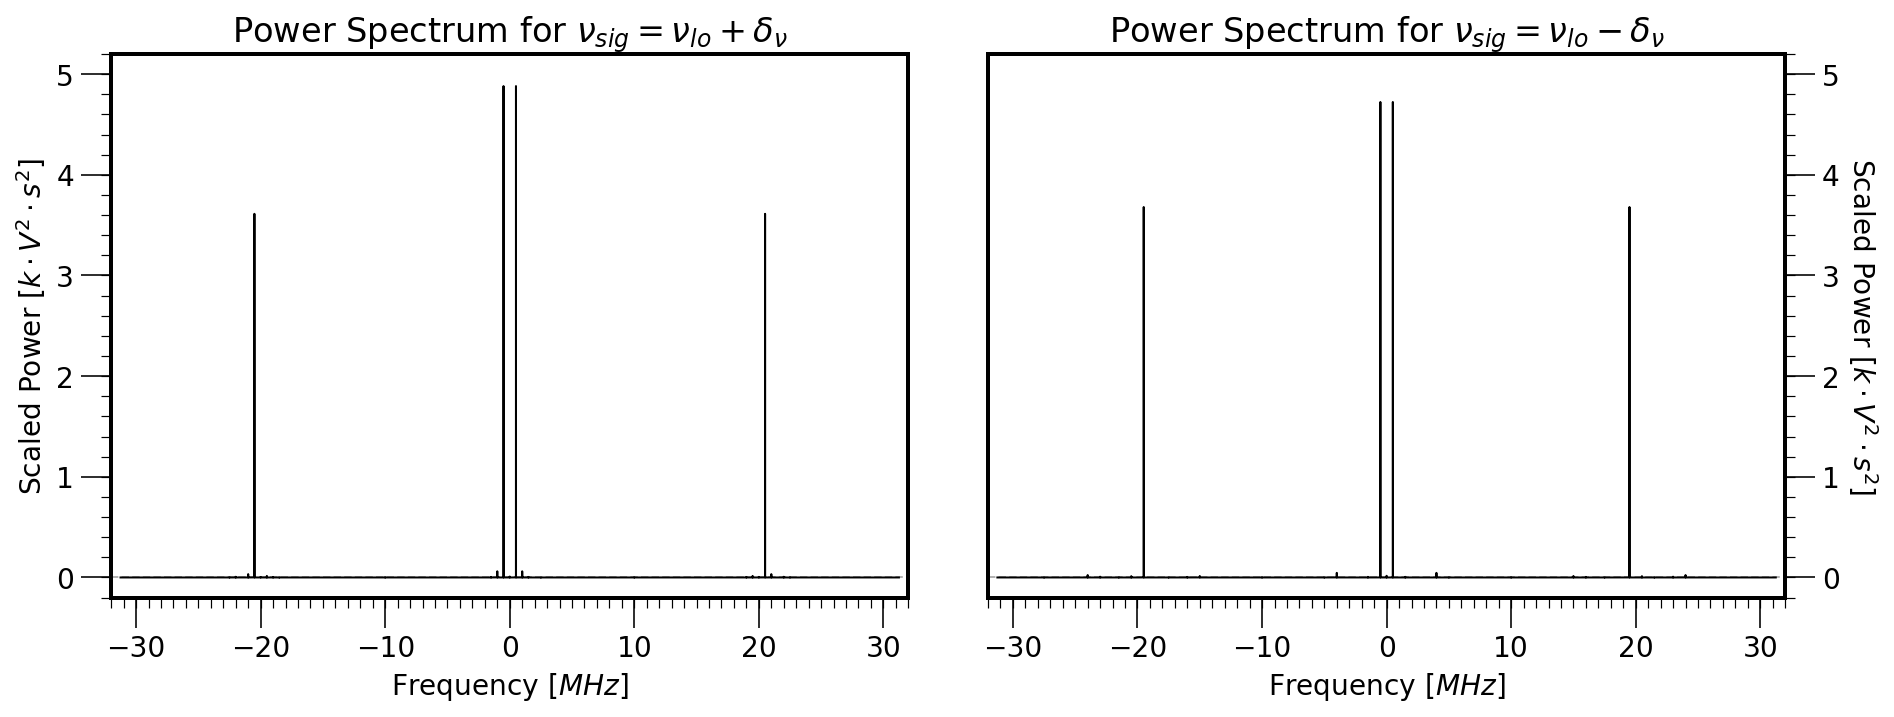

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

PLOT_SCALE = 1e12 / .7

axes[0].set_title(r'Power Spectrum for $\nu_{sig} = \nu_{lo} + \delta_\nu$')

axes[0].plot(np.fft.fftshift(freqs),
             np.fft.fftshift(plus_power) / PLOT_SCALE,
             color = 'black',
             linewidth = 1,
             label = r'$\nu_{sig} = \nu_{lo} + \delta_\nu$')
    
axes[1].set_title(r'Power Spectrum for $\nu_{sig} = \nu_{lo} - \delta_\nu$')

axes[1].plot(np.fft.fftshift(freqs),
             np.fft.fftshift(minus_power) / PLOT_SCALE,
             color = 'black',
             linewidth = 1,
             label = r'$\nu_{sig} = \nu_{lo} - \delta_\nu$')

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[0].set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')
axes[1].set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 20)



for ax in axes:
    ax.set_xlabel('Frequency [$MHz$]')
    
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(.2))
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(which='major', length = 15)
    ax.tick_params(which='minor', length = 5)
    ax.axhline(0, color = 'black', linewidth = 1, alpha = 0.3, ls = '--')
    ax.set_xlim(-32, 32)
    ax.set_ylim(-.2, 5.2)
    
fig.subplots_adjust(wspace=0.1)
plt.show()
fig.savefig('power_5_1.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [7]:
minus_filtered = np.copy(minus_fft)
filter_index_range = 300
minus_filtered[int(filter_index_range/2):N_samples-int(filter_index_range/2)] = 0
minus_filtered[:5] = 0

minus_reconstructed = np.fft.ifft(minus_filtered) * sampling_time

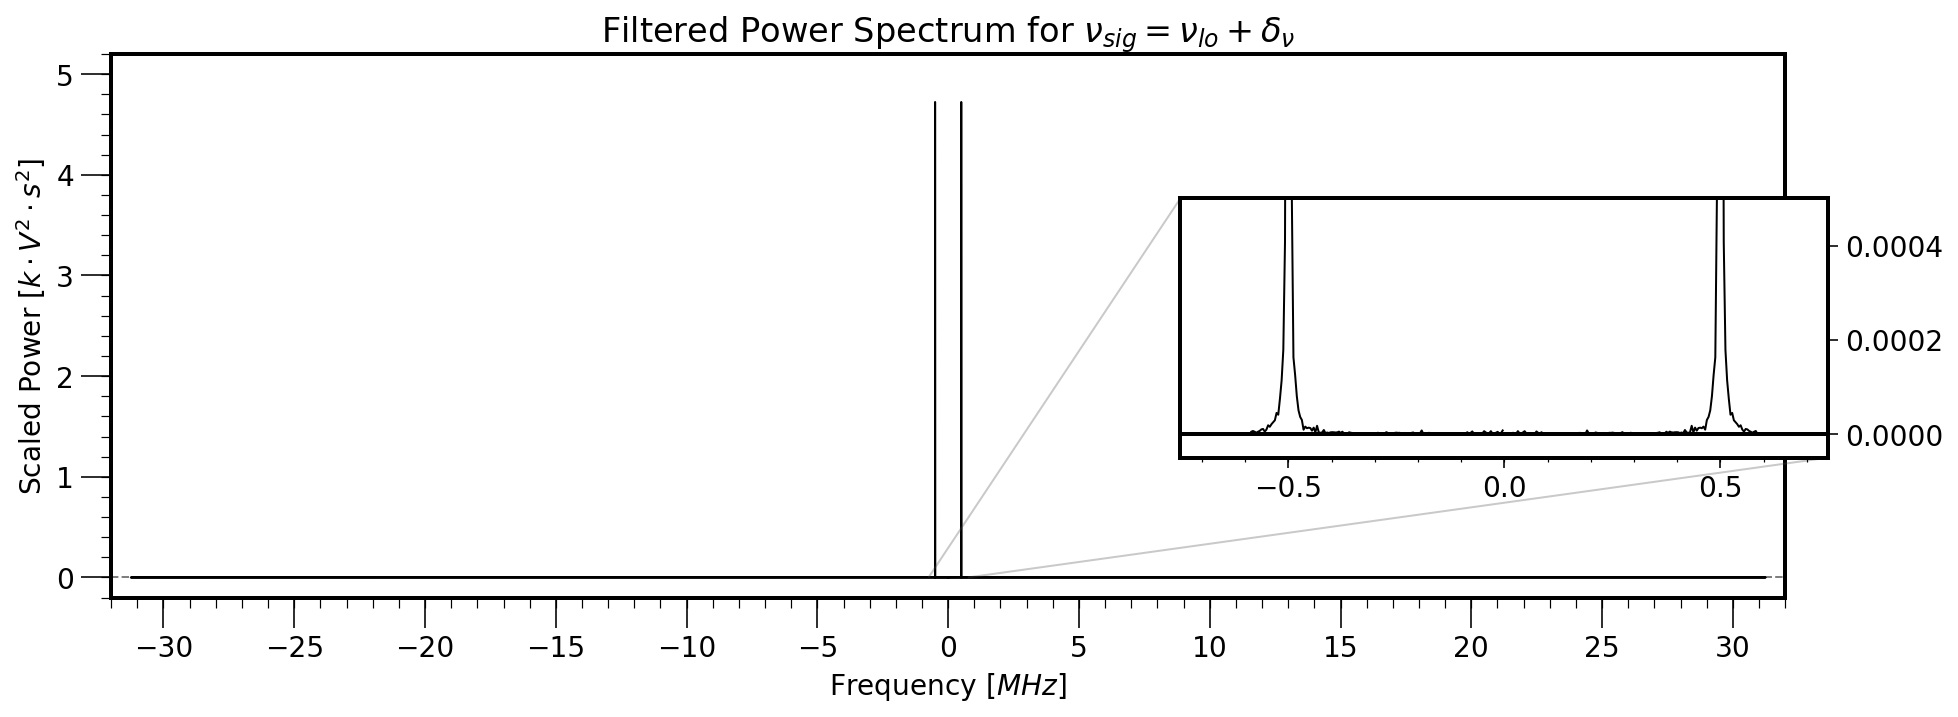

In [9]:
fig, ax = plt.subplots( figsize = (15,5))

PLOT_SCALE = 1e12 / .7

ax.plot(freqs,
        np.abs(minus_filtered)**2 / PLOT_SCALE,
        color = 'black',
        linewidth = 1)

ax.set_title(r'Filtered Power Spectrum for $\nu_{sig} = \nu_{lo} + \delta_\nu$')
    
ax.set_xlabel(r'Frequency [$MHz$]')
ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')

ax.set_xlim(-32, 32)
ax.set_ylim(-.2, 5.2)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(.2))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', length = 15)
ax.tick_params(which='minor', length = 5)
ax.axhline(0, color = 'black', linewidth = 1, ls = '--', alpha = 0.5)
    

# # Add inset to figure
axins = inset_axes(ax,
                   4.5,1.8,
                   loc = 8,
                   bbox_to_anchor = (0.77, .3),
                   bbox_transform = ax.figure.transFigure)

# # Mark the inset location
mark_inset(ax,
           axins,
           loc1 = 2,
           loc2 = 4,
           ec = "0.3",
           alpha = 0.3)


axins.plot(freqs,
           np.abs(minus_filtered)**2  / PLOT_SCALE,
           color = 'black',
           linewidth = 1)


axins.set_xlim([-.75,.75])
axins.set_ylim([-0.00005,0.0005])
axins.yaxis.tick_right()
axins.yaxis.set_label_position('right')
axins.xaxis.set_major_locator(MultipleLocator(0.5))
axins.xaxis.set_minor_locator(MultipleLocator(0.1))
axins.tick_params(which='major', length = 5)
axins.tick_params(which='minor', length = 2)
axins.axhline(0, color = 'black', linewidth = 2)

fig.subplots_adjust(wspace=0.1)
plt.show()
fig.savefig('filtered_power_plus_5_1_inset.pdf', dpi = 'figure', format = 'pdf', transparent = True)

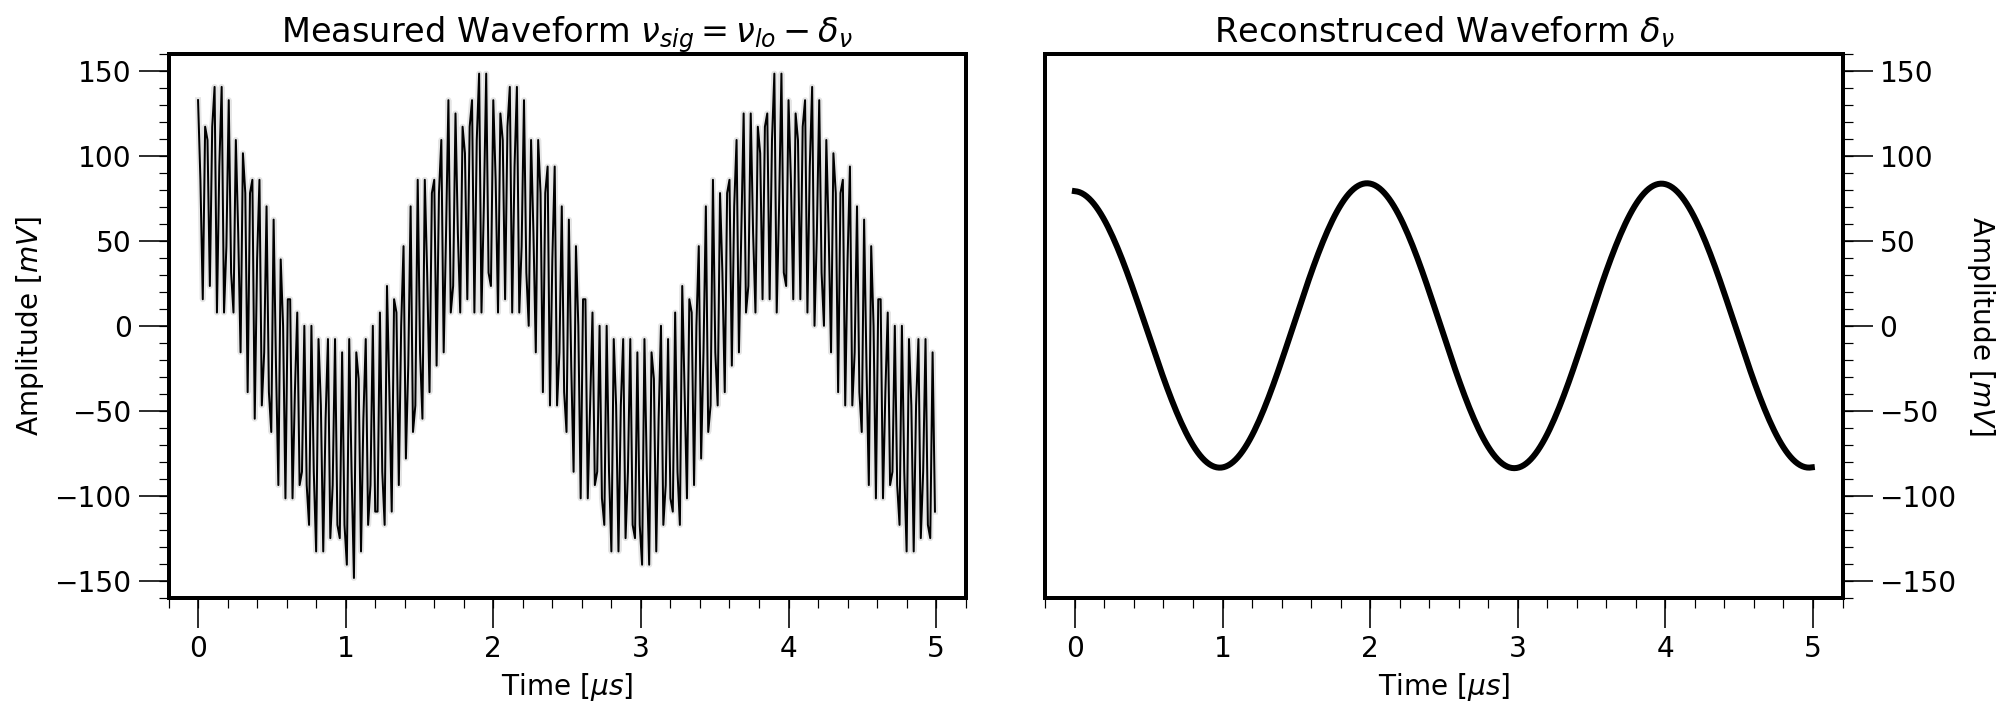

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].plot(times[:313],
             minus_data[:313] * 1e3,
             alpha = 0.1,
             linewidth = 3,
             color = 'black',
             label = r'$\nu_{sig} = \nu_{lo} + \delta_\nu$')

axes[0].plot(times[:313],
             minus_data[:313] * 1e3,
             alpha = 1,
             linewidth = 1,
             color = 'black',
             label = r'$\nu_{sig} = \nu_{lo} + \delta_\nu$')

axes[0].set_title(r'Measured Waveform $\nu_{sig} = \nu_{lo} - \delta_\nu$')

axes[1].plot(times[:313],
             minus_reconstructed[:313].real * 1e3,
             color = 'black',
             linewidth =3,
             label = r'$\nu_{sig} = \nu_{lo} + \delta_\nu$')

axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set_title(r'Reconstruced Waveform $\delta_\nu$')
axes[1].set_ylim(axes[0].get_ylim())
axes[0].set_ylabel('Amplitude $[mV]$')
axes[1].set_ylabel('Amplitude $[mV]$', rotation = 270, labelpad = 20)



for ax in axes:
    
    ax.set_xlabel(r'Time $[\mu s]$')
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.tick_params(which='major', length = 15)
    ax.tick_params(which='minor', length = 5)

    
    ax.set_ylim(-160,160)
    ax.set_xlim(-0.2, 5.2)
    
fig.subplots_adjust(wspace=0.1)
fig.savefig('waveform_reconstructed_minus_5_1.pdf', dpi = 'figure', format = 'pdf', transparent = True)
plt.show()